<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M1.304 · Inteligencia Artificial Avanzada / M0.539 · Inteligencia Artificial</p>
<p style="margin: 0; text-align:right;">MU Ingeniería Informática / MU Ingeniería Computacional y Matemática</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

## Código del capítulo 2: Sistemas recomendadores y clustering

Código 2.1: distancia y similitud euclídea entre dos vectores

In [ ]:
import numpy as np

from scipy.spatial.distance import euclidean

a = np.array([5, 3, 4, -1, 0])
b = np.array([2, 4, 0, -5, -2])

dist = euclidean(a, b)

print('Distancia =', dist)

simil = 1 / (1 + dist)

print('Similitud =', simil)

Distancia = 6.782329983125268
Similitud = 0.12849622184722817


Código 2.2: coeficiente de Pearson entre dos vectores

In [ ]:
import numpy as np

from scipy.spatial.distance import correlation

a = np.array([5, 3, 4, -1, 0])
b = np.array([2, 4, 0, -5, -2])

correl = correlation(a, b)

print('Correlacion a y b =', correl)



Correlacion a y b = 0.19256876944694246


Instalación Surprise

In [ ]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8 MB 5.0 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630203 sha256=3c29d0684c73c16f33b54849bacc6e97a219e72a38fd3469f9436b8746985cd9
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise


Añadir acceso al drive desde colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pwd

'/content'

Cambiar de directorio de trabajo para cargar los datos:

In [ ]:
cd /content/drive/MyDrive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb

[Errno 2] No such file or directory: '/content/drive/MyDrive/IA avançada/IA Avançada (equip docent)/20202/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb/'
/content


In [ ]:
pwd

'/content/drive/MyDrive/Assignatures/IA avançada/IA Avançada (M0.539, M1.204, M1.304) + Labs/Recursos Software Assignatura/Revisió codi assignatura/code_ipynb'

Código 2.3: carga de datos con Surprise

In [ ]:
import surprise.dataset
fich = 'ml-100k/u.data'
# Los nombres de las columnas son predefinidos y tienen significado
# para Surprise, asi que no se pueden cambiar
columnas = 'user item rating timestamp'
lector = surprise.dataset.Reader(line_format = columnas, sep='\t')
dades = surprise.dataset.Dataset.load_from_file(fich,reader=lector)
# datos.split(n_folds = 5)
cv_iterator = surprise.model_selection.KFold(n_splits=5)
cv_iterator.split(dades) # Allows to iterate over folds (train_set, test_set)

<generator object KFold.split at 0x7fae7e5ae6d0>

Código 2.4: generación de valoraciones individuales

In [ ]:
entrenament = dades.build_full_trainset()
metode=surprise.KNNBasic()
# metode.train(entrenament)
metode.fit(entrenament)
usuari=str(196)
element=str(242)
prediccio=metode.predict(usuari, element, r_ui=3)
print('Estimada =', prediccio.est, ' real=', prediccio.r_ui)
usuari=str(196)
element=str(302)
prediccio=metode.predict(usuari, element)
print('Estimada =', prediccio.est)

Computing the msd similarity matrix...
Done computing similarity matrix.
Estimada = 3.801407384878779  real= 3
Estimada = 4.06292421377939


Código 2.5: validación cruzada

In [ ]:
similOpts = {'name': 'pearson'}
metode2 = surprise.KNNWithMeans(k=20, sim_options=similOpts)
# metode2.train(entrenament) # metode2.fit(entrenament)
# results=surprise.evaluate(metode2, dades, measures=['RMSE', 'MAE'])
results = surprise.model_selection.cross_validate(metode2, dades, cv=5, measures=['RMSE', 'MAE'], verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9598  0.9538  0.9627  0.9577  0.9509  0.9570  0.0042  
MAE (testset)     0.7515  0.7484  0.7534  0.7516  0.7450  0.7500  0.0030  
Fit time          1.29    1.29    1.32    1.35    1.36    1.32    0.03    
Test time         3.04    2.98    3.06    3.10    3.04    3.04    0.04    


Código 2.6: recomendador con SVD

In [ ]:
metode3 = surprise.SVD()
# metode3.train(entrenament) #metode3.fit(entrenament)
# results=surprise.evaluate(metode3, dades, measures=['RMSE', 'MAE'])
# surprise.print_perf(results)
results = surprise.model_selection.cross_validate(metode3, dades, cv=5, measures=['RMSE', 'MAE'], verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9345  0.9301  0.9311  0.9457  0.9364  0.9356  0.0056  
MAE (testset)     0.7373  0.7326  0.7369  0.7425  0.7377  0.7374  0.0031  
Fit time          4.76    4.78    4.74    4.77    4.81    4.77    0.02    
Test time         0.24    0.15    0.24    0.24    0.16    0.20    0.04    


Código 2.7: ajuste de parámetros


In [ ]:
paramReixeta= {'n_epochs':[5, 10], 'lr_all':[0.002, 0.005], 'reg_all':[0.4, 0.6]}
# cerca=surprise.GridSearch(surprise.SVD, paramReixeta, measures=['RMSE'])
search = surprise.model_selection.GridSearchCV(surprise.SVD, paramReixeta, measures=['RMSE'])
# cerca.evaluate(dades)
search.fit(dades)
for grid, value in zip(search.cv_results['params'], search.cv_results['mean_test_rmse']):
  print(grid, 'rmse:', value)
# print(cerca.best_score['RMSE'])
print('Best score:', search.best_score['rmse'])
# print(cerca.best_params['RMSE'])
print('Best params:',search.best_params['rmse'])

{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.4} rmse: 0.9910294921470977
{'n_epochs': 5, 'lr_all': 0.002, 'reg_all': 0.6} rmse: 0.9977193317514568
{'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.4} rmse: 0.9697426994354437
{'n_epochs': 5, 'lr_all': 0.005, 'reg_all': 0.6} rmse: 0.9789014191863478
{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.4} rmse: 0.9734052292537225
{'n_epochs': 10, 'lr_all': 0.002, 'reg_all': 0.6} rmse: 0.9821045124402076
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4} rmse: 0.9609818521757635
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.6} rmse: 0.9712107817323622
Best score: 0.9609818521757635
Best params: {'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


Código 2.8: carga de datos de los jugadores

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 23 17:40:36 2017

@author: samir
"""

###########################################################
import numpy

# Lee un fichero con los datos de los jugadores, devuelve una
# matriz con dos columnas, horasJuego y horasChat
# (cada fila es un jugador)
def leeJugadores(nombreFichero):
    with open(nombreFichero) as fichero:
        lineas = [(l.strip()).split('\t') for l in fichero]

    horasJuego = [float(x[0]) for x in lineas]
    horasChat  = [float(x[1]) for x in lineas]

    matriz = numpy.column_stack((horasJuego, horasChat), )

    return matriz


# Leer los datos de los jugadores
datos = leeJugadores('data/players.data')




Código 2.9: agrupamiento jerárquico

In [ ]:
###########################################################


from scipy.cluster.hierarchy import dendrogram, linkage

# Generar la matriz de enlace (enlace completo)
enlace = linkage(datos, method = 'complete', metric = 'euclidean')

# El formato de la matriz de enlace es id1, id2, distancia, numero
# de puntos unidos, y representa que puntos se unen en cada paso
# del agrupamiento aglomerativo. Por ejemplo:
for i in [0, 1, 100, 1000, 2000, 2082]:
    print('id1=%d id2=%d dist=%.4f num=%d'%tuple(enlace[i,]))

# id1=14 id2=19 dist=0.0250 num=2
# id1=28 id2=33 dist=0.0250 num=2
# id1=769 id2=782 dist=0.0250 num=2
# id1=430 id2=2516 dist=0.0559 num=3
# id1=3787 id2=3993 dist=0.5154 num=22
# id1=4164 id2=4165 dist=5.2923 num=2084

# Los indices mayores al numero de elementos se refieren a los
# grupos formados por el algoritmo. Concretamente, es la linea
# en la que fueron creados (al numero hay que restarle el numero
# de elementos del conjunto, por ejemplo si el indice es 3000 y
# hay 2000 elementos, entonces se trata del grupo formado en la
# linea 1000).


id1=14 id2=19 dist=0.0250 num=2
id1=28 id2=33 dist=0.0250 num=2
id1=769 id2=782 dist=0.0250 num=2
id1=430 id2=2516 dist=0.0559 num=3
id1=3787 id2=3993 dist=0.5154 num=22
id1=4164 id2=4165 dist=5.2923 num=2084


Código 2.10: agrupamiento jerárquico

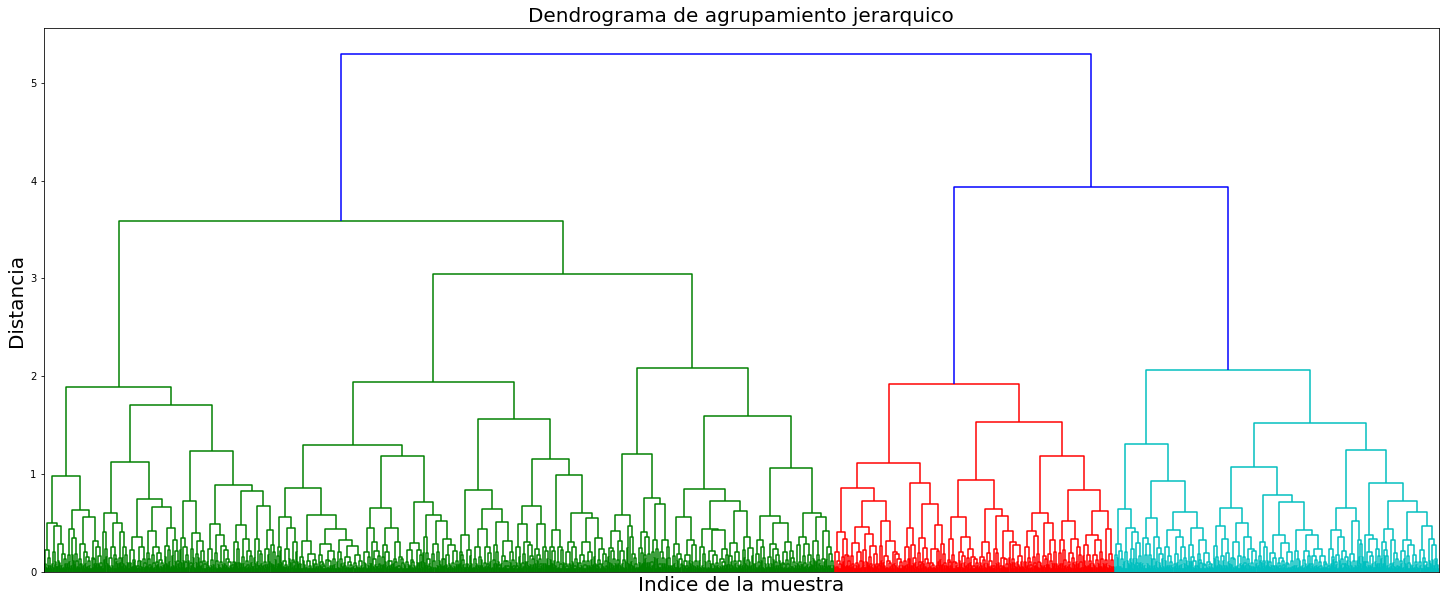

In [ ]:
###########################################################

from matplotlib import pyplot as plt

# Mostrar el dendrograma o diagrama de arbol
plt.figure(figsize=(25, 10))
plt.title('Dendrograma de agrupamiento jerarquico', fontsize=20)
plt.xlabel('Indice de la muestra', fontsize=20)
plt.ylabel('Distancia', fontsize=20)

dendrogram(enlace, orientation = 'top', no_labels = True)

plt.show()

Código 2.11: agrupamiento k-medios

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 23 17:40:36 2017

@author: samir
"""

###########################################################
import numpy

# Lee un fichero con los datos de los jugadores, devuelve una matriz
# con dos columnas, horasJuego y horasChat (cada fila es un jugador)
def leeJugadores(nombreFichero):
    with open(nombreFichero) as fichero:
        lineas = [(l.strip()).split('\t') for l in fichero]

    horasJuego = [float(x[0]) for x in lineas]
    horasChat  = [float(x[1]) for x in lineas]

    matriz = numpy.column_stack((horasJuego, horasChat), )

    return matriz


# Leer los datos de los jugadores
datos = leeJugadores('data/players.data')

###########################################################


from sklearn.cluster import KMeans

# Configurar el algoritmo para que calcule 4 grupos y aplicarlo
# a los datos
kmedios = KMeans(n_clusters = 4)
kmedios.fit(datos)

# Ver las etiquetas de grupo de los 100 primeros puntos
print(kmedios.labels_[:100])
# [0 0 0 ..., 0 0 2]

# Ver cuales son los centros de los 4 grupos
print(kmedios.cluster_centers_)
#[[ 3.22010753  3.92903226]
# [ 3.29138889  1.21      ]
# [ 2.02299107  2.9937872 ]
# [ 1.13938632  1.07887324]]


# Preguntar al agrupamiento a que grupo pertenecerian nuevos puntos
print(kmedios.predict([[2, 3], [4, 1]]))
# [2 1]

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 3 3 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 3 1 1 1
 1 1 1 1 1 3 3 1 1 1 3 3 1 1 1 1 1 1 1 1 3 3 1 1 1 3]
[[3.29138889 1.21      ]
 [3.221875   3.9294181 ]
 [1.13938632 1.07887324]
 [2.02355126 2.99491085]]
[3 0]


Código 2.12: agrupamiento espectral

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Wed Aug 23 17:40:36 2017

@author: samir
"""

###########################################################
import numpy

# Lee un fichero con los datos de los jugadores, devuelve una matriz con dos
# columnas, horasJuego y horasChat (cada fila es un jugador)
def leeJugadores(nombreFichero):
    with open(nombreFichero) as fichero:
        lineas = [(l.strip()).split('\t') for l in fichero]

    horasJuego = [float(x[0]) for x in lineas]
    horasChat  = [float(x[1]) for x in lineas]

    matriz = numpy.column_stack((horasJuego, horasChat), )

    return matriz


# Leer los datos de los jugadores
datos = leeJugadores('data/players.data')

###########################################################


from sklearn.cluster import SpectralClustering

# Configurar el algoritmo para que calcule 4 grupos y aplicarlo
sc = SpectralClustering(n_clusters = 4)
sc.fit(datos)

# Ver las etiquetas de grupo de los 100 primeros puntos
print(sc.labels_[:100])
# [0 0 0 ..., 1 1 0]

[0 0 0 0 0 3 3 0 3 3 3 3 3 0 0 3 3 3 0 0 3 3 3 3 3 3 3 0 0 0 3 3 3 0 0 0 0
 3 3 3 3 3 3 3 3 0 0 0 0 3 3 3 3 3 0 0 0 0 3 3 3 3 3 0 0 3 3 3 3 3 0 3 3 3
 3 3 3 3 3 0 0 3 3 3 0 0 0 0 3 3 3 3 3 3 0 0 0 3 3 0]


## Code 2.1: Euclidean distance and Similarity between two vectors

In [1]:
# This code demonstrates how to calculate Euclidean distance and similarity between two vectors
# The Euclidean distance measures how "far apart" two points/vectors are
# The similarity is calculated as 1/(1+distance) to get a value between 0 and 1, where:
# - Values closer to 1 mean more similar
# - Values closer to 0 mean less similar

import numpy as np  # numpy for array operations
from scipy.spatial.distance import euclidean  # euclidean distance function from scipy

# Create two sample vectors with 5 dimensions each
# These could represent, for example, ratings that two users gave to 5 different movies
a = np.array([5, 3, 4, -1, 0])   # First vector
b = np.array([2, 4, 0, -5, -2])  # Second vector

# Calculate the Euclidean distance between vectors a and b
# The Euclidean distance is the square root of the sum of squared differences
dist = euclidean(a, b)
print('Distance =', dist)

# Convert distance to similarity using the formula 1/(1+distance)
# This transformation has useful properties:
# - When distance = 0 (identical vectors), similarity = 1
# - As distance grows larger, similarity approaches 0
# - Always gives values between 0 and 1
simil = 1 / (1 + dist)
print('Similarity =', simil)

# Note: This similarity metric is often used in recommender systems
# to find users or items that are "close" to each other in some feature space

Distance = 6.782329983125268
Similarity = 0.12849622184722817
